# Heart Disease Prediction

#### Many people die because of Heart Disease, mainly because they weren't able to get the medical help in time -- 
#### So I have build this model, that uses Machine Learning Classification Alogorithms that can predict if a patient is likely to have a heart disease or not based on many relevant features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


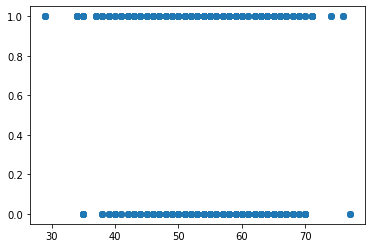

In [4]:
plt.scatter(dataset['age'], dataset['target'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [8]:
np.unique(dataset['ca'])

array([0, 1, 2, 3, 4], dtype=int64)

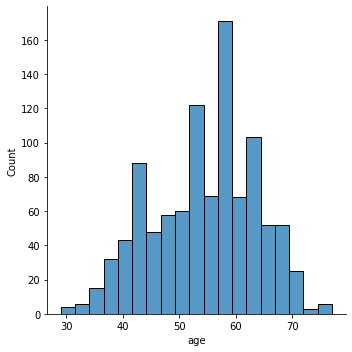

In [9]:
sns.displot(dataset['age'])

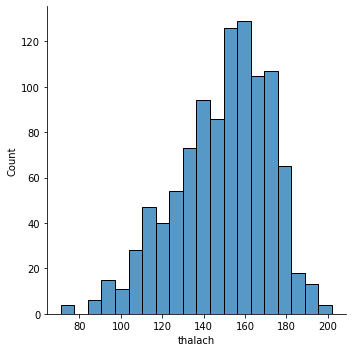

In [10]:
sns.displot(dataset['thalach'])

C:\Users\Harsh-Ayansh\AppData\Local\Temp\ipykernel_27156\557843666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sex'])


<AxesSubplot: xlabel='sex', ylabel='Density'>

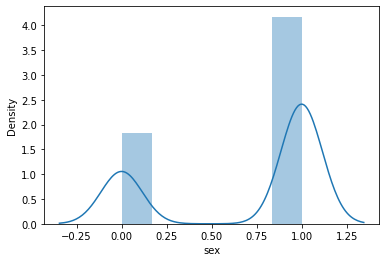

In [11]:
sns.distplot(dataset['sex'])

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Spliting into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1025, 13)
(1025,)
(820, 13)
(205, 13)
(820,)
(205,)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X_train)

In [16]:
print(scaler_x)

[[-1.40503359  0.64895597  1.97748631 ...  0.97028605  1.17427458
  -0.5144228 ]
 [ 1.26270023 -1.5409366   1.01170979 ... -0.6668221   0.21616
  -0.5144228 ]
 [-0.18232226  0.64895597  1.01170979 ...  0.97028605  2.13238916
  -0.5144228 ]
 ...
 [ 1.15154465  0.64895597  1.97748631 ... -0.6668221   0.21616
  -0.5144228 ]
 [ 1.3738558   0.64895597 -0.91984324 ... -0.6668221  -0.74195458
  -0.5144228 ]
 [ 0.59576677  0.64895597  1.01170979 ... -0.6668221  -0.74195458
  -0.5144228 ]]


In [17]:
print(X_train.shape)
print(scaler_x.shape)

(820, 13)
(820, 13)


## Logistic Regression Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0)
log_model.fit(scaler_x, y_train)

LogisticRegression(random_state=0)

In [19]:
log_y_pred = log_model.predict(X_test)
np.concatenate((log_y_pred.reshape(len(log_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1]], dtype=int64)

## KNN Model Building

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
knn_y_pred = knn_model.predict(X_test)
np.concatenate((knn_y_pred.reshape(len(knn_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1]], dtype=int64)

In [22]:
knn_y_pred = knn_model.predict(X_test)
np.concatenate((knn_y_pred.reshape(len(knn_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1]], dtype=int64)

## SVM Model bulding

In [23]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=0)
svc_model.fit(scaler_x, y_train)

SVC(random_state=0)

In [24]:
svc_y_pred = svc_model.predict(scaler.transform(X_test))
np.concatenate((svc_y_pred.reshape(len(svc_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1]], dtype=int64)

## Naive Byes Model Building

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(scaler_x, y_train)

GaussianNB()

In [26]:
nb_y_pred = nb_model.predict(scaler.transform(X_test))
np.concatenate((nb_y_pred.reshape(len(nb_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:20]

array([[1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int64)

## Decision Tree Classification model building

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(scaler_x, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
dt_y_pred = dt_model.predict(scaler.transform(X_test))
np.concatenate((dt_y_pred.reshape(len(dt_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1]], dtype=int64)

## Random Forest Classification model building

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)
rf_model.fit(scaler_x, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [30]:
rf_y_pred = rf_model.predict(scaler.fit_transform(X_test))
np.concatenate((rf_y_pred.reshape(len(rf_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1]], dtype=int64)

## Model Evalution

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, recall_score, f1_score
def get_model_evalution(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision = average_precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy: {accuracy}')
    print(f'confusion matrix: \n {matrix}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'F1 score: {f1}')

#### For cases like medical diagnoisis, accuracy doesn't matter much, having good recall score really matters because in these situations having more false negatives can be highly undesirable

In [32]:
get_model_evalution(y_test, log_y_pred) # Logistic regression

accuracy: 0.5317073170731708
confusion matrix: 
 [[98  0]
 [96 11]]
precision: 0.5710964212445863
recall: 0.102803738317757
F1 score: 0.1864406779661017


In [33]:
log_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([1], dtype=int64)

In [34]:
get_model_evalution(y_test, knn_y_pred) # K-nearest Neighbours

accuracy: 0.7463414634146341
confusion matrix: 
 [[74 24]
 [28 79]]
precision: 0.7028679173462635
recall: 0.7383177570093458
F1 score: 0.7523809523809523


In [35]:
knn_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([0], dtype=int64)

In [36]:
get_model_evalution(y_test, svc_y_pred) # Support Vector Machine -> good recall, precision, accuracy -- low False predictions

accuracy: 0.9658536585365853
confusion matrix: 
 [[ 92   6]
 [  1 106]]
precision: 0.9424614933732781
recall: 0.9906542056074766
F1 score: 0.9680365296803651


In [37]:
svc_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([1], dtype=int64)

In [38]:
get_model_evalution(y_test, nb_y_pred) # Naive Byes

accuracy: 0.8536585365853658
confusion matrix: 
 [[79 19]
 [11 96]]
precision: 0.8026223724244557
recall: 0.897196261682243
F1 score: 0.8648648648648648


In [39]:
nb_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([1], dtype=int64)

In [40]:
get_model_evalution(y_test, dt_y_pred) # Best model --> 100% accuracy, no false predictions

accuracy: 1.0
confusion matrix: 
 [[ 98   0]
 [  0 107]]
precision: 1.0
recall: 1.0
F1 score: 1.0


In [41]:
dt_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([1], dtype=int64)

In [42]:
get_model_evalution(y_test, rf_y_pred)

accuracy: 1.0
confusion matrix: 
 [[ 98   0]
 [  0 107]]
precision: 1.0
recall: 1.0
F1 score: 1.0


In [43]:
rf_model.predict(scaler.transform([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]))

array([1], dtype=int64)

In [44]:
svc_model.predict(scaler.transform([[0, 1, 0, 94, 120, 1, 1, 70, 1, 0.0, 0, 0, 0]]))

array([1], dtype=int64)

## Dumping the Random Forest and Decision Tree model into a .pkl file

In [45]:
pickle.dump(rf_model, open('./ML Models/RandomForest_model.pkl', 'wb'))
pickle.dump(dt_model, open('./ML Models/SupportVectorMachine_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Dump the Scaler object that can be used in App.py

In [46]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [47]:
import sklearn
sklearn.__version__

'1.2.2'